In [30]:
#importing Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
# from crypt import methods
from matplotlib.pyplot import inferno

In [31]:
pwd = os.getcwd()                                               #current working directory
print(pwd)
Track_file = pwd + "/Spotify_data/tracks.csv"
spotifyFut = pwd + "/Spotify_data/SpotifyFeatures.csv"          # assigning file to respective variable

/Users/apple/Documents/fastapi


In [32]:
print(Track_file)
df_trks = pd.read_csv(Track_file)  
df_SpotFut = pd.read_csv(spotifyFut)                                      #read Tracks file
df_trks.columns

/Users/apple/Documents/fastapi/Spotify_data/tracks.csv


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [33]:
df_trks.isnull().sum()                                    # check dataframe is any null value.. and resoective null value sum

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [34]:
df_short = df_trks.sort_values("popularity", ascending = True)       # sorting data based on popularity col

In [35]:
df_trks.shape                                                        # check num of rows and columns

(586672, 20)

In [36]:
df_short.head()                                                 # check file head .... it will print first 5 rows

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4


In [37]:
df_short.describe().transpose()                             # computes and displays summary statistics and transpose for columns into rows and the rows into columns.

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In Histogram bins value squareroot of (total numarical) and roundup

array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'explicit'}>,
        <AxesSubplot: title={'center': 'danceability'}>],
       [<AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>],
       [<AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: >]], dtype=object)

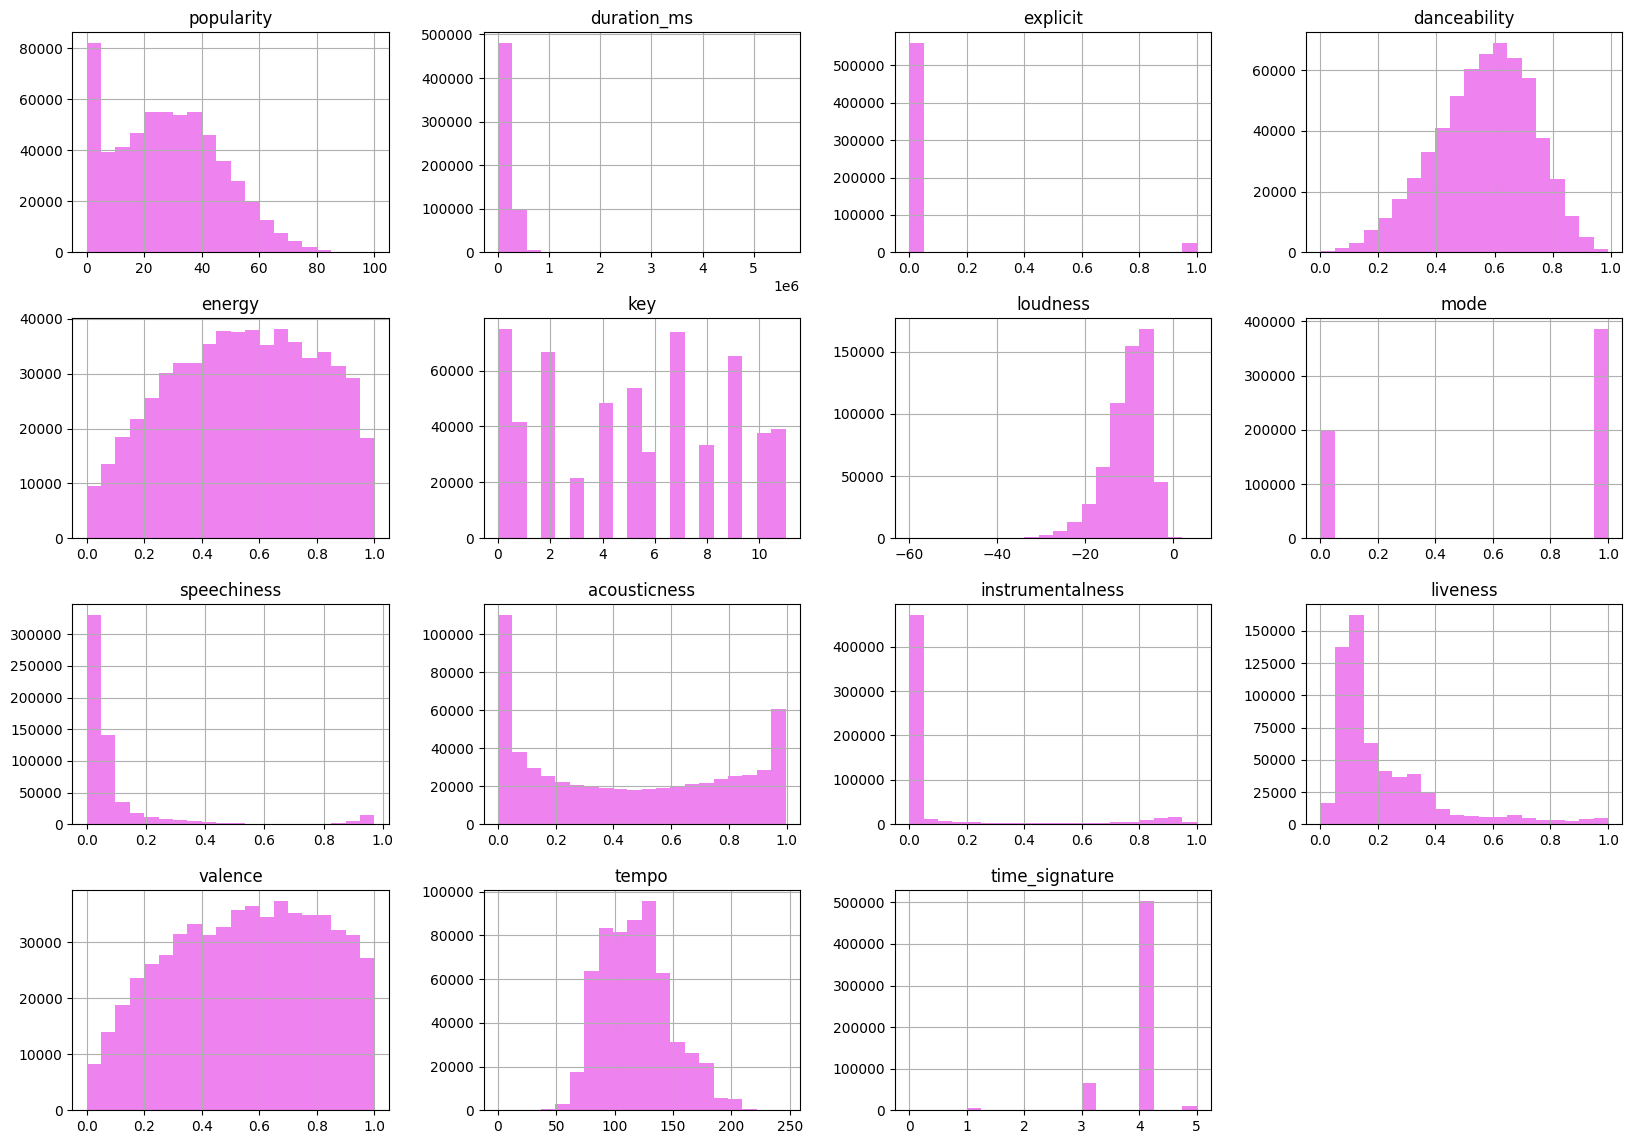

In [38]:
df_trks.hist(bins = 20, color = 'violet', figsize = (20, 14))    # Histogram of the dataframe each numerical columns

In [39]:
most_popular = df_trks[df_trks["popularity"]>90].sort_values(by="popularity",ascending=False)     # take most popular graterthen 90 based on popularity col
most_popular.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4


In [40]:
df_trks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [41]:
df_trks[['artists']].iloc[349]              # In artists column will pick specific place value uing iloc

artists    ['Janusz Korczak']
Name: 349, dtype: object

In [42]:
df_trks['duration'] = df_trks['duration_ms'].apply(lambda x:round(x/1000))         # the column duration_ms value will roundoff 
df_trks.drop("duration_ms",inplace=True,axis=1)

In [43]:
df_trks.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


In [44]:
df_trks['artists'].value_counts()               # value_counts function ['artists'] column will show most frequently occuring elements

['Die drei ???']                   3856
['TKKG Retro-Archiv']              2006
['Benjamin Blümchen']              1503
['Bibi Blocksberg']                1472
['Lata Mangeshkar']                1373
                                   ... 
['IU', 'Jang Yi-jeong']               1
['黃宗澤']                               1
['Vincy Chan', '海鳴威']                 1
['Dough-Boy']                         1
['Gentle Bones', 'Clara Benin']       1
Name: artists, Length: 114030, dtype: int64

In [45]:
df_trks[df_trks['duration']==2354]['artists']       #in duration columns euqals the values it will shw same position value in artists column

33646    ['Umm Kulthum']
38191    ['Umm Kulthum']
Name: artists, dtype: object

In [46]:
df_drop= df_trks.drop(["explicit","mode","key"],axis=1).corr(method="pearson")      # drop unwanted columns in the dataframe

/var/folders/t9/08j8tvfj7gb6ww90w8kxzzdc0000gn/T/ipykernel_9219/3245890880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_drop= df_trks.drop(["explicit","mode","key"],axis=1).corr(method="pearson")      # drop unwanted columns in the dataframe


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

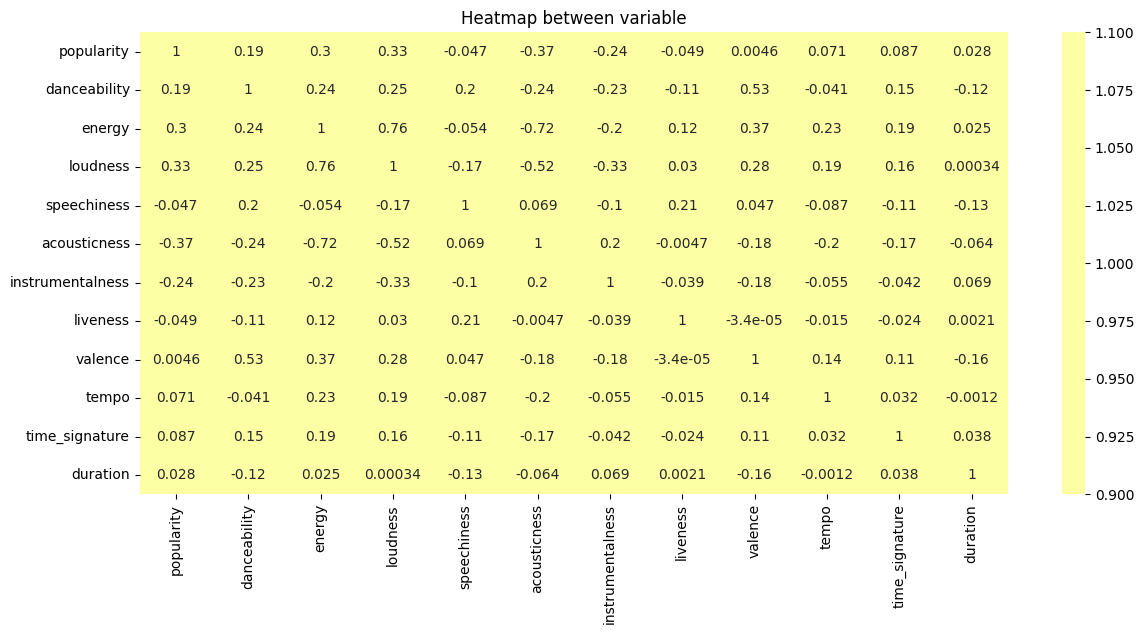

In [47]:
plt.figure(figsize=(14,6))                                                         # Using matplotlib heatmap chart derived we can give costomsize
heatmap=sns.heatmap(df_drop,annot=True,vmin=1,vmax=1,center=0,cmap="inferno")      # afer dropcloumns corelations between variables heatmap plot 
heatmap.set_title('Heatmap between variable')                                      # plot title
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)                     # set_xticks it will take only tick positions

In [48]:
df_sample=df_trks.sample(int(0.004*len(df_trks)))           #taking Samples from Orignal dataframe
df_sample.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
193271,5DnDUJnqo7Fo7tPWYBP74p,Pajaro Chogüi,23,0,['Julio Iglesias'],['4etuCZVdP8yiNPn4xf0ie5'],1980-12-14,0.632,0.748,7,-11.049,1,0.0921,0.479000,0.000000,0.2390,0.814,118.901,4,187
13923,7zUn8bZIQAYClgbcz0ss27,Crap Shootin' Blues,0,0,['One Arm Slim'],['2EcimaTNo8eeR82H0xwlqt'],1939-01-12,0.538,0.133,7,-13.431,1,0.2680,0.994000,0.020900,0.1170,0.860,92.738,3,172
499150,1Zrp7X6zEn6VxLVdQ00Izl,Schickeria,39,0,['Spider Murphy Gang'],['7LdEfCVOGOJ2jaAxsmnTeN'],2003-01-01,0.655,0.819,9,-10.747,1,0.0368,0.262000,0.000033,0.1260,0.834,104.276,4,220
301882,7oSQG8KgYbrcR2kgwUD9SU,The Days Of The Phoenix,51,0,['AFI'],['19I4tYiChJoxEO5EuviXpz'],2000-01-01,0.396,0.986,11,-4.467,0,0.0574,0.000981,0.000409,0.2300,0.546,110.720,4,208
229849,72ZPAFKPOyDRQa9B1ICncO,שוויה שוויה,18,0,['Hatikva 6'],['3umXlcgiDTcCRkvPVobeJc'],2009-05-13,0.765,0.656,1,-6.273,0,0.1830,0.161000,0.000000,0.0783,0.839,77.019,4,232


In [49]:
len(df_sample)

2346

[Text(0.5, 1.0, 'Loudness vs Energy corr')]

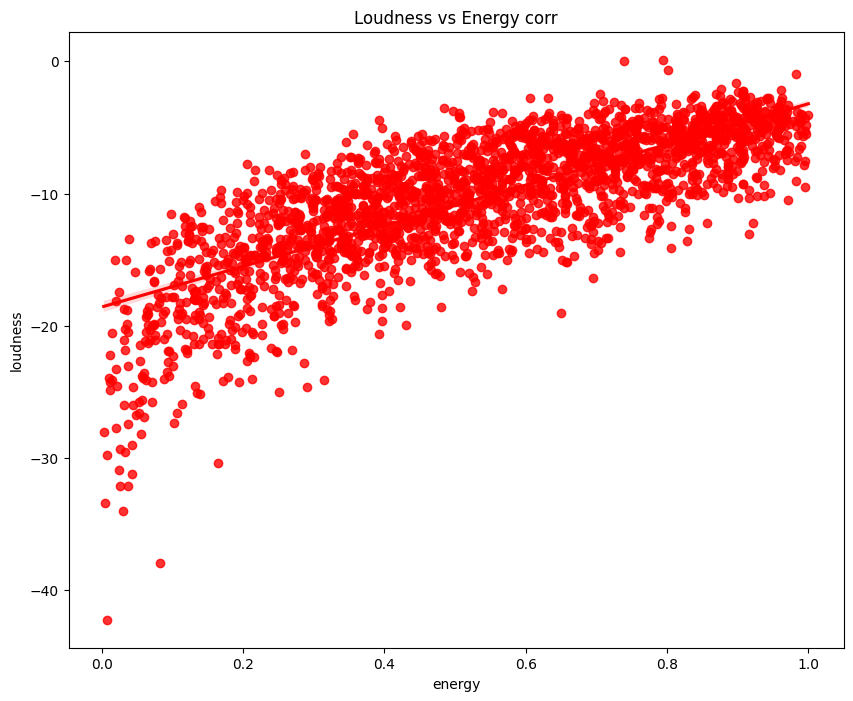

In [50]:
plt.figure(figsize=(10,8))                                                                          # linear regression
sns.regplot(data=df_sample,y="loudness",x="energy",color="r").set(title="Loudness vs Energy corr")  # plot between loudness and energy

Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

[Text(0.5, 1.0, 'popurarity vs acoustic corr')]

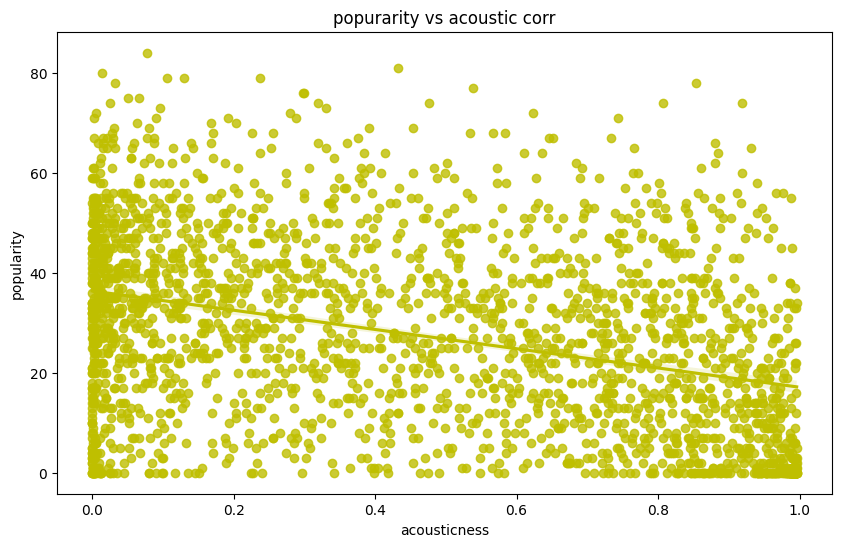

In [51]:
plt.figure(figsize=(10,6))                                                                                      # linear regression
sns.regplot(data=df_sample,y="popularity",x="acousticness",color="y").set(title="popurarity vs acoustic corr")  # plot popularity and acousticness 

In [52]:
df_trks['dates']=pd.to_datetime(df_trks["release_date"])            # 'release_date' column is object so it's convert to date format 
df_trks.info()                                                      # - and assign to 'dates' column   .info() show dtyps in dataframe columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   release_date      586672 non-null  object        
 7   danceability      586672 non-null  float64       
 8   energy            586672 non-null  float64       
 9   key               586672 non-null  int64         
 10  loudness          586672 non-null  float64       
 11  mode              586672 non-null  int64         
 12  speechiness       586672 non-null  float64       
 13  acousticness      586672 non-null  float64       
 14  inst

In [53]:
df_trks['release_date']=pd.to_datetime(df_trks["release_date"])             # 'release_date' column is object so it's convert to date format 
df_trks['year']=df_trks["release_date"].dt.year                             # 'Year' column to assingn year data from 'release_date' column 
df_trks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   release_date      586672 non-null  datetime64[ns]
 7   danceability      586672 non-null  float64       
 8   energy            586672 non-null  float64       
 9   key               586672 non-null  int64         
 10  loudness          586672 non-null  float64       
 11  mode              586672 non-null  int64         
 12  speechiness       586672 non-null  float64       
 13  acousticness      586672 non-null  float64       
 14  inst

The distplot represents the univariate distribution of data

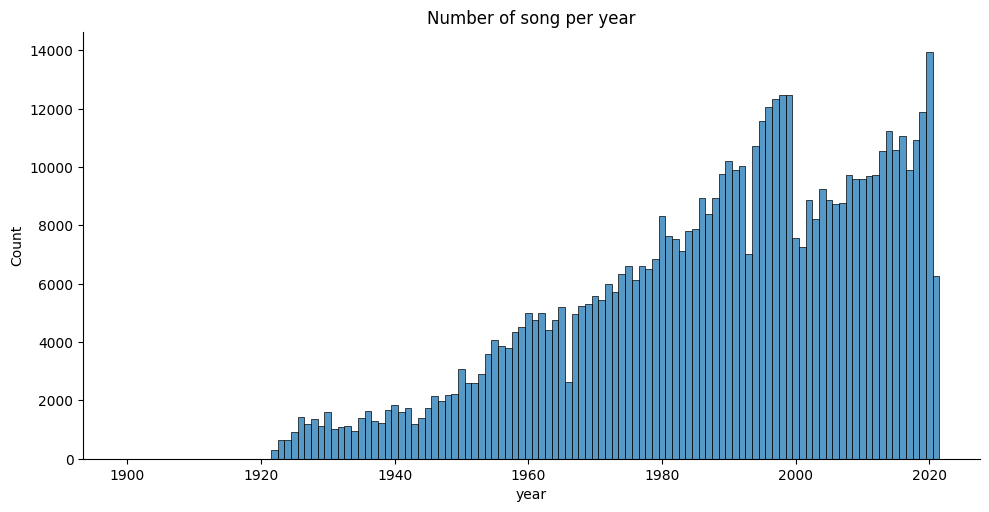

In [54]:
sns.displot(df_trks["year"],discrete=True,aspect=2,height=5,kind="hist").set(title="Number of song per year") 
# it will show number of songs per year released model histogram plot and costume plot title

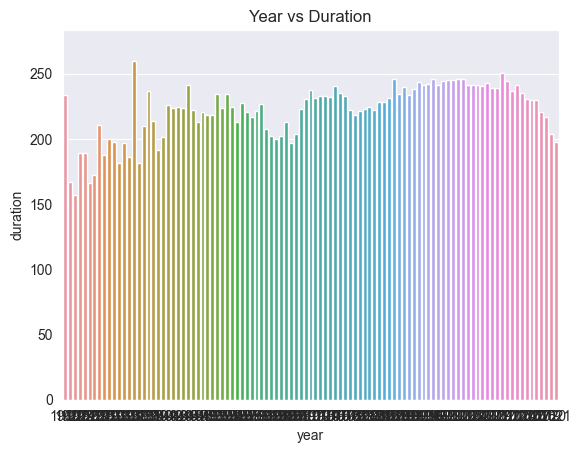

In [60]:
total_dr=df_trks['duration']                                                                    # duration column assign to seprae variable
fig,ax=plt.subplots()
fig=sns.barplot(x=df_trks['year'],y=total_dr,ax=ax,errwidth=False).set(title="Year vs Duration") # Bar plot Year vs Duration
# plt.xticks(rotation=90)     

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

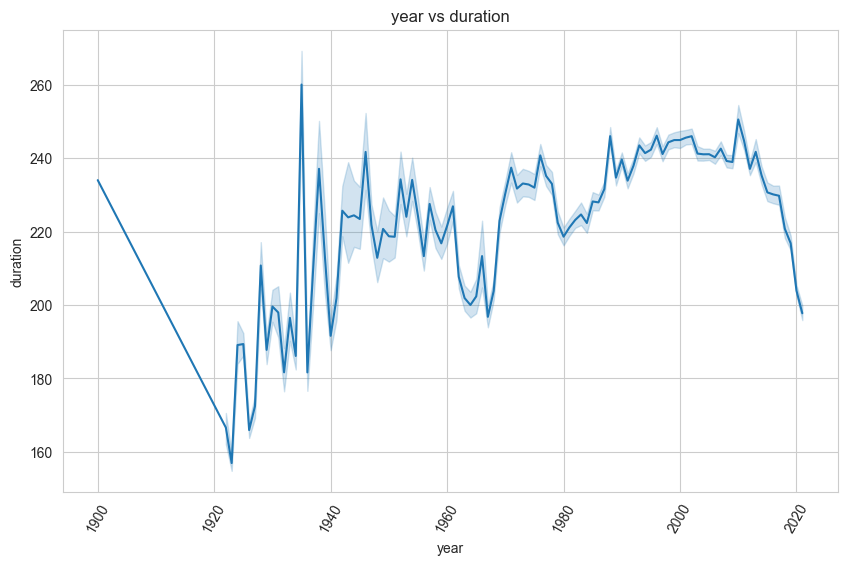

In [56]:
sns.set_style(style="whitegrid")                                                   # Set style of plot
fig_dims=(10,6)                                                                    # Set Dimontion size of figure
fig,ax=plt.subplots(figsize=fig_dims)
fin=sns.lineplot(x=df_trks['year'],y=total_dr,ax=ax).set(title="year vs duration")   # choosing Line plot for Year vs Duration
plt.xticks(rotation=60)                                                             # X value lable rotate 60"

In [57]:
df_SpotFut.head()                                                   # Spotify_Feature Dataset head shows first 4-rows with Columns

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0, 0.5, 'Geners')

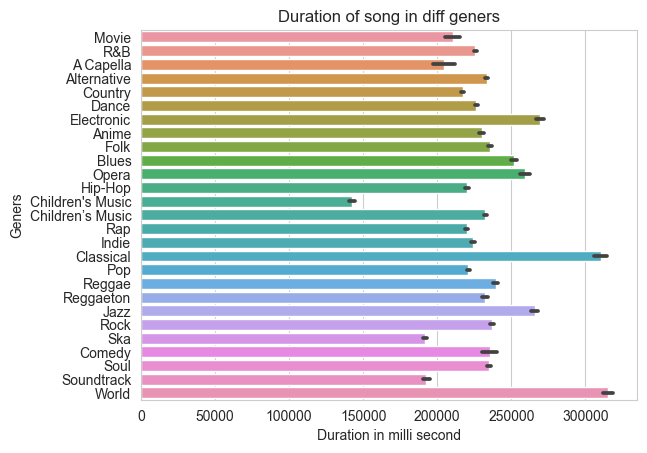

In [58]:
plt.title("Duration of song in diff geners")                                    # Set Title of plot
sns.color_palette("rocket",as_cmap=True)                                        # Choose color palette
sns.barplot(y=df_SpotFut["genre"],x=df_SpotFut["duration_ms"],data=df_SpotFut)  # Bar plot genre vs duration_ms
plt.xlabel("Duration in milli second")                                          # give xlabe title
plt.ylabel("Geners")                                                            # give ylabe title

[Text(0.5, 1.0, 'Top 10 genere Papularity')]

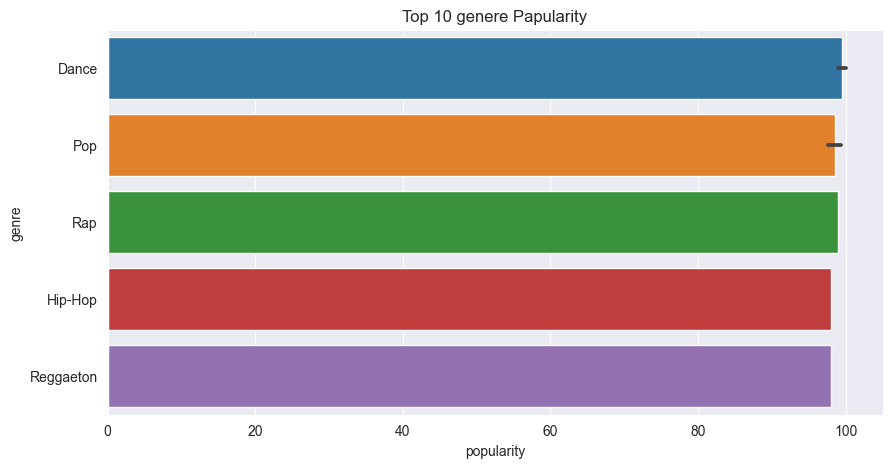

In [59]:
sns.set_style(style="darkgrid")                                     # Set style of plot
plt.figure(figsize=(10,5))                                          # Set Dimontion size of figure
famous = df_SpotFut.sort_values("popularity",ascending=False).head(10)  # Sorting by "popularity" column & assign first 10-rows to 'famous' variable
sns.barplot(y="genre",x="popularity",data=famous).set(title="Top 10 genere Papularity")    # Bar plot genre vs popularity